In [1]:
pip install numpy pandas keras opencv-python Pillow tensorflow tqdm


Note: you may need to restart the kernel to use updated packages.


# Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import keras
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Input
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from tensorflow.keras.layers import Conv2D  # Updated import statement for Conv2D
from tensorflow.keras.layers import MaxPooling2D  # Updated import statement for MaxPooling2D
from numpy import array

# Importing the dataset 

In [2]:
df_train = pd.read_csv('trainset.csv')

In [3]:
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [4]:
df_train.values


array([['000c1434d8d7', 2],
       ['001639a390f0', 4],
       ['0024cdab0c1e', 1],
       ...,
       ['ffcf7b45f213', 2],
       ['ffd97f8cd5aa', 0],
       ['ffec9a18a3ce', 2]], dtype=object)

In [5]:
df_train.tail()

,id_code,diagnosis
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0
3661,ffec9a18a3ce,2


## converting df_train into a series and get_dummies

In [6]:
targets_series = pd.Series(df_train['diagnosis'])
one_hot = pd.get_dummies(targets_series, sparse = True)

In [7]:
targets_series[:10]

0    2
1    4
2    1
3    0
4    0
5    4
6    0
7    2
8    2
9    1
Name: diagnosis, dtype: int64

In [8]:
one_hot[:10]

,0,1,2,3,4
0,0,0,1,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,0,0,0,0,1
6,1,0,0,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [9]:
one_hot_labels = np.asarray(one_hot)
one_hot_labelsY = np.asarray(targets_series)
one_hot_labelsY[:10]

array([2, 4, 1, 0, 0, 4, 0, 2, 2, 1], dtype=int64)

## initializing the shape of the image and the arrays to load image and label

In [10]:
im_size1 = 786
im_size2 = 786
x_train = []
y_train = []

In [11]:
i = 0 
for f, breed in tqdm(df_train.values):
    print(f)

100%|██████████████████████████████████████████████████████████████████████████| 3662/3662 [00:00<00:00, 229462.65it/s]

000c1434d8d7
001639a390f0
0024cdab0c1e
002c21358ce6
005b95c28852
0083ee8054ee
0097f532ac9f
00a8624548a9
00b74780d31d
00cb6555d108
00cc2b75cddd
00e4ddff966a
00f6c1be5a33
0104b032c141
0124dffecf29
0125fbd2e791
012a242ac6ff
014508ccb9cb
0151781fe50b
0161338f53cc
0180bfa26c0b
0182152c50de
01b3aed3ed4c
01c7808d901d
01d9477b1171
01eb826f6467
01f7bb8be950
0212dd31f623
022f820027b8
0231642cf1c2
0232dfea7547
02358b47ea89
0243404e8a00
025a169a0bb0
02685f13cefd
026dcd9af143
02cd34a85b24
02da652c74b8
02dda30d3acf
0304bedad8fe
0318598cfd16
032d7b0b4bf6
033f2b43de6d
034cb07a550f
03676c71ed1b
0369f3efe69b
03747397839f
03a7f4a5786f
03b373718013
03c85870824c
03e25101e8e8
03fd50da928d
03ff7d159f10
0415fc68b176
041f09eec1e8
0423237770a7
042470a92154
04579e31e4be
04a6fc58dabc
04ac765f91a1
04aef84a2cc1
04d029cfb612
04efb1a284cc
050bb1eafa76
05113073b268
05195a3db5e2
0519b934f6b1
052d9a3fe55a
05339950962e
054b1b305160
0551676cc2aa
059bc89df7f4
05a5183c92d0
05b1bb2bdb81
05cd0178ccfe
05e9126dfa5c
06024377d573

In [12]:
df_test = df_train[:1000]

In [13]:
i=0
for f, breed in tqdm(df_test.values):
    try:
        img = image.load_img(('10_left.jpeg.'.format(f)), target_size=(786, 786))
        arr = image.img_to_array(img)
        label = one_hot_labelsY[i]
        x_train.append(arr)
        y_train.append(label)
        i += 1 
    except:
        pass

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:19<00:00,  5.01it/s]


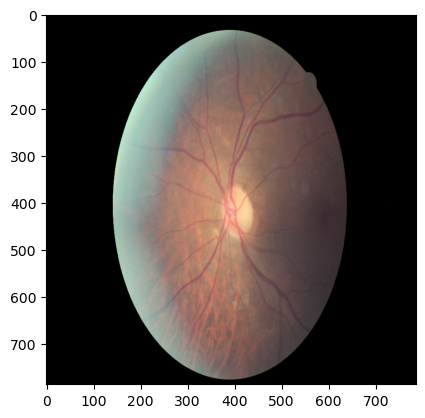

In [14]:
plt.imshow(x_train[681]/255)

In [15]:
print(len(x_train))


1000


### the model has 2 convolutional leyers, 2 max pooling layes, image flattening layer and a dence layer.

In [16]:
x_valid = []
y_valid = []
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [17]:
visible = Input(shape=(786,786,3))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
y_train_raw = np.array(Y_train)
x_train_raw = np.array(X_train)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 786, 786, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 783, 783, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 391, 391, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 388, 388, 16)      8208      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 194, 194, 16)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 602176)            0     